In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tr=pd.read_csv('train.csv',index_col=0)
ts=pd.read_csv('test.csv',index_col=0)

In [3]:
tr.isnull().sum()[tr.isnull().sum()>0]/len(tr)*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [4]:
tr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
fig, ax=plt.subplot(1,2)
ax[0].plot(tr['LotFrontage'])

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

In [4]:
tr.drop(columns=['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],inplace=True)
ts.drop(columns=['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],inplace=True)

In [5]:
tr.fillna(tr.mean(),inplace=True)
ts.fillna(ts.mean(),inplace=True)

C:\Users\Ashwin\AppData\Local\Temp/ipykernel_5608/2462411036.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tr.fillna(tr.mean(),inplace=True)
C:\Users\Ashwin\AppData\Local\Temp/ipykernel_5608/2462411036.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ts.fillna(ts.mean(),inplace=True)


In [6]:
tr.isnull().sum()[tr.isnull().sum()>0]/len(tr)*100

MasVnrType      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [7]:
import random

random.choice([0,1,'Fa'])

0

In [8]:
def fillWithRandoms(columns):
    for col in columns:
        options=[]
        options.extend(tr[col].value_counts().index[-2:])
        tr[col].fillna(random.choice(options),inplace=True)
        ts[col].fillna(random.choice(options),inplace=True)

In [9]:
fillWithRandoms(tr.isnull().sum()[tr.isnull().sum()>0].index.tolist())
fillWithRandoms(ts.isnull().sum()[ts.isnull().sum()>0].index.tolist())

In [10]:
ts.isnull().sum()[ts.isnull().sum()>0]

Series([], dtype: int64)

In [11]:
tr.isnull().sum()[tr.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
tr['Age']=2021-tr['YearBuilt']
ts['Age']=2021-ts['YearBuilt']

In [13]:
def indexEncoder(columns):
    for col in range(len(columns)):
        if(columns[col]=="object"):
            replacements={value:index for index,value in enumerate(tr[tr.columns[col]].unique())}
            tr[tr.columns[col]].replace(replacements,inplace=True)

In [14]:
indexEncoder(tr.dtypes.values)

In [15]:
tr.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
ExterQual      -0.265015
BsmtFinType1   -0.386447
HeatingQC      -0.427649
Foundation     -0.429678
Age            -0.522897
Name: SalePrice, Length: 76, dtype: float64

In [16]:
tr['OverallCond'].corr(tr['Age'])

0.37598319560698973

In [17]:
X=tr.drop('SalePrice',axis=1)
y=tr['SalePrice']

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf=RandomForestRegressor()

In [20]:
rf.fit(X,y)

RandomForestRegressor()

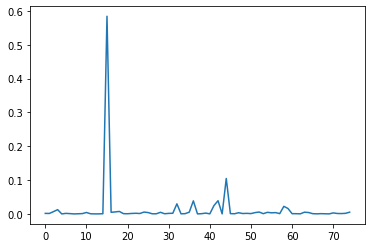

In [21]:
plt.plot(rf.feature_importances_)

In [22]:
rf.feature_importances_.argmax()

15

In [23]:
[X.columns[44],X.columns[15]]

['GrLivArea', 'OverallQual']

In [24]:
rf.fit(X[[X.columns[44],X.columns[15]]],y)

RandomForestRegressor()

In [25]:
preds=rf.predict(X[[X.columns[44],X.columns[15]]])

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
print("RMSE",np.sqrt(mean_squared_error(y,preds)))

RMSE 18231.482463321514
